In [402]:
#-*- coding: utf-8 -*-
import sys
print(sys.stdout.encoding)

UTF-8


In [403]:

#!pip3 install googletrans
#!pip3 install sys
#!pip3 install nltk
#!pip3 install wordcloud

In [404]:
import numpy as np # algebra linear
import pandas as pd # processamento de dados, arquivos CSV I/O.import os
import os
import unidecode
import re
from googletrans import Translator
import nltk
#nltk.download()

In [405]:
tweets = pd.read_csv(r"C:\Users\rfsantos\OneDrive - Mongeral Aegon\2020\Modulos\BI\NLP\tweets_plus.csv")
tweets.head(20)

,Unnamed: 0,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,0,2019-07-29 19:30:00,Primeira foto no carro novo\n#plussize #plussi...,lillooficial_,False,0,0,0,Brazil
1,1,2019-07-29 16:15:58,#VEMPRASEDUCAO que aki tem calcinha plus size...,seducaosexy,False,0,0,0,Brazil
2,2,2019-07-29 11:58:55,Mais uma segunda de trabalho Fenomenal!\n\n#wo...,Lancellot85,False,0,0,0,Brazil
3,3,2019-07-29 11:04:22,♡♡♡♡LINGERIE PLUS SIZE BRANCA.\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍S...,Joselaide,False,0,0,0,Brazil
4,4,2019-07-29 01:07:41,Seja muito bem-vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil
5,5,2019-07-29 01:04:09,Seja muito bem-vinda nova semana! Semana de no...,rebotazzoli,False,0,0,0,Brazil
6,0,2019-07-31 21:31:03,"🗨Me diz, não são Maravilhosas⁉️\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n🖤...",Joselaide,False,0,0,0,Brazil
7,1,2019-07-31 17:25:52,🚫PROMOÇÃO IMPERDÍVEL📍\n\nModelos de legguing C...,LINDAGMAIS,False,0,0,0,Brazil
8,2,2019-07-31 15:36:12,loja de lingerie pluss size:\nmoça tem esse nú...,jamillyprim,False,6,0,0,Brazil
9,3,2019-07-31 14:00:47,Vem aí Desfile Moda Plus Size da Loja Uhaul\nC...,GeorgealbertoTG,False,0,0,0,Brazil


In [406]:
tweets = tweets.drop(['Unnamed: 0'], axis=1)
tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,Primeira foto no carro novo\n#plussize #plussi...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,#VEMPRASEDUCAO que aki tem calcinha plus size...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,Mais uma segunda de trabalho Fenomenal!\n\n#wo...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,♡♡♡♡LINGERIE PLUS SIZE BRANCA.\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍S...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,Seja muito bem-vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil


In [407]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas

lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
tweets['tweet'] = tweets.tweet.map(lower_alpha)

tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,primeira foto no carro novo\n#plussize #plussi...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,#vempraseducao que aki tem calcinha plus size...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal!\n\n#wo...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,♡♡♡♡lingerie plus size branca.\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍s...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,seja muito bem-vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil


In [408]:
# Parece que há muitos "<br>" por aí. Vamos nos livrar deles.

remove_www = lambda x: re.sub(r'www' , ' ', x.lower())
tweets['tweet'] = tweets.tweet.map(remove_www)

tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,primeira foto no carro novo\n#plussize #plussi...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,#vempraseducao que aki tem calcinha plus size...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal!\n\n#wo...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,♡♡♡♡lingerie plus size branca.\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍s...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,seja muito bem-vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil


In [409]:
# Parece que há muitos "<br>" por aí. Vamos nos livrar deles.

remove_br = lambda x: re.sub(r""" br """, ' ', x.lower())
tweets['tweet'] = tweets.tweet.map(remove_br)

tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,primeira foto no carro novo\n#plussize #plussi...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,#vempraseducao que aki tem calcinha plus size...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal!\n\n#wo...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,♡♡♡♡lingerie plus size branca.\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍s...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,seja muito bem-vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil


In [410]:
# Essa expressão regular remove toda a pontuação
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
tweets['tweet'] = tweets.tweet.map(punc_re)

tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,primeira foto no carro novo\n plussize plussi...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,vempraseducao que aki tem calcinha plus size...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal \n\n wo...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,♡♡♡♡lingerie plus size branca \n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍s...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,seja muito bem vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil


In [411]:
# Essa expressão regular remove todos os emojis

emoji_re = lambda x: re.sub('[(\U0001F600-\U0001F92F|\U0001F300-\U0001F5FF|\U0001F680-\U0001F6FF|\U0001F190-\U0001F1FF|\U00002702-\U000027B0|\U0001F926-\U0001FA9F|\u200d|\u2640-\u2642|\u2600-\u2B55|\u23cf|\u23e9|\u231a|\ufe0f)]+',' ',x)
tweets['tweet'] = tweets.tweet.map(emoji_re)

tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,primeira foto no carro novo\n plussize plussi...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,vempraseducao que aki tem calcinha plus size...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal \n\n wo...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,lingerie plus size branca \n \n sutiã com boj...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,seja muito bem vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil


In [412]:
# Essa expressão regular remove todos os \n

special_re = lambda x: re.sub(r'\n',' ', x)
tweets['tweet'] = tweets.tweet.map(special_re)

#sem_especiais = lambda x: re.sub('[(â™¡)|(^€â)|(^ðÿ)|(^â€)|(\n)|(�)|(€)|(‹)|(¤)|(š«)|(‰ï)|(˜±)]',' ', x)
#tweets['tweet'] = tweets.tweet.map(sem_especiais)

tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,primeira foto no carro novo plussize plussiz...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,vempraseducao que aki tem calcinha plus size...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal work...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,lingerie plus size branca sutiã com bojo ...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,seja muito bem vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil


In [413]:
#translator = Translator()
#tweets['tweet'] = tweets['tweet'].apply(translator.translate, src='pt', dest='en').apply(getattr, args=('text',))
#tweets.head(20)
#tweets.to_csv('PS_tratados_en.csv')

In [414]:
#tweets = pd.read_csv(r"C:\Users\rfsantos\OneDrive - Mongeral Aegon\2020\Modulos\BI\NLP\PS_tratados_en.csv")
#tweets.head(20)

In [415]:
special_re = lambda x: re.sub('[(â™¡)|(^€â)|(^ðÿ)|(^â€)|(¦)|(�)|(€)|(‹)|(¤)|(š«)|(‰ï)|(˜±)|(©)|(º)|(…)]',' ', x)
tweets['tweet'] = tweets.tweet.map(special_re)
tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,primeira foto no carro novo plussize plussiz...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,vempraseducao que aki tem calcinha plus size...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal work...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,lingerie plus size branca sutiã com bojo ...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,seja muito bem vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil


In [416]:
tweets.iloc[1,1]

' vempraseducao que  aki tem calcinha plus size a partir de r         loja    calçadão josé de alvarenga  n    sobreloja     e   galeria baltazar         centro   duque de caxias   rj      loja    rua   https     instagram com p    igshid  \xa0 '

In [417]:
blank_re = lambda x: re.sub('\s+',' ', x)
tweets['tweet'] = tweets.tweet.map(blank_re)
tweets.head(20)

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,primeira foto no carro novo plussize plussizef...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,vempraseducao que aki tem calcinha plus size ...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal work pl...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,lingerie plus size branca sutiã com bojo meia...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,seja muito bem vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil
5,2019-07-29 01:04:09,seja muito bem vinda nova semana semana de nov...,rebotazzoli,False,0,0,0,Brazil
6,2019-07-31 21:31:03,me diz não são maravilhosas⁉ as camisolas plu...,Joselaide,False,0,0,0,Brazil
7,2019-07-31 17:25:52,promoção imperdível modelos de legguing cirre...,LINDAGMAIS,False,0,0,0,Brazil
8,2019-07-31 15:36:12,loja de lingerie pluss size moça tem esse núme...,jamillyprim,False,6,0,0,Brazil
9,2019-07-31 14:00:47,vem aí desfile moda plus size da loja uhaul co...,GeorgealbertoTG,False,0,0,0,Brazil


In [418]:
tweets.iloc[1,1]

' vempraseducao que aki tem calcinha plus size a partir de r loja calçadão josé de alvarenga n sobreloja e galeria baltazar centro duque de caxias rj loja rua https instagram com p igshid '

In [419]:
# Tokenize as reviews em palavras
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

tweets['tokens'] = tweets.tweet.map(word_tokenize)
tweets.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rfsantos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,tokens
0,2019-07-29 19:30:00,primeira foto no carro novo plussize plussizef...,lillooficial_,False,0,0,0,Brazil,"[primeira, foto, no, carro, novo, plussize, pl..."
1,2019-07-29 16:15:58,vempraseducao que aki tem calcinha plus size ...,seducaosexy,False,0,0,0,Brazil,"[vempraseducao, que, aki, tem, calcinha, plus,..."
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal work pl...,Lancellot85,False,0,0,0,Brazil,"[mais, uma, segunda, de, trabalho, fenomenal, ..."
3,2019-07-29 11:04:22,lingerie plus size branca sutiã com bojo meia...,Joselaide,False,0,0,0,Brazil,"[lingerie, plus, size, branca, sutiã, com, boj..."
4,2019-07-29 01:07:41,seja muito bem vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil,"[seja, muito, bem, vinda, nova, semana, de, mu..."


In [420]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(tweets.tokens.tolist(), [])

word_list[:30]

['primeira',
 'foto',
 'no',
 'carro',
 'novo',
 'plussize',
 'plussizefashion',
 'plussizebrasil',
 'mulherplussize',
 'mulherplusbrasil',
 'livrepraamar',
 'livreprasorrir',
 'mulherãodaporra',
 'bodypositive',
 'girlpower',
 'girlplus',
 'womanplus',
 'https',
 'instagram',
 'com',
 'p',
 'igshid',
 'vempraseducao',
 'que',
 'aki',
 'tem',
 'calcinha',
 'plus',
 'size',
 'a']

In [421]:
# Estas são as etapas para encontrar as palavras mais comuns

from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:30]

[(3314, 'com'),
 (2630, 'plus'),
 (2510, 'size'),
 (2305, 'https'),
 (2042, 'de'),
 (2015, 'instagram'),
 (1999, 'p'),
 (1920, 'igshid'),
 (1892, 'e'),
 (1510, 'em'),
 (1406, 'que'),
 (1404, 'a'),
 (1146, 'plussize'),
 (1060, 'o'),
 (945, 'é'),
 (701, 'do'),
 (689, 'não'),
 (660, 'eu'),
 (586, 'para'),
 (577, 'moda'),
 (575, 'uma'),
 (569, 'no'),
 (557, 'twitter'),
 (526, 'da'),
 (457, 'na'),
 (452, 'um'),
 (448, 'se'),
 (433, 'pra'),
 (399, 'linda'),
 (397, 'tem')]

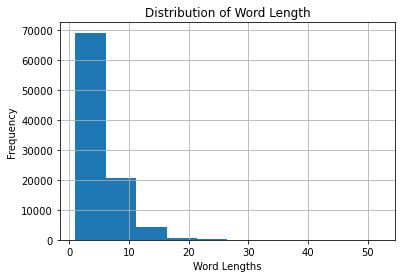

In [422]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=10)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

In [423]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stopword_list = stopwords.words('portuguese')
stopword_list.append('plus')
stopword_list.append('size')
stopword_list.append('plussize')
stopword_list.append('plussizefashion')
stopword_list.append('plussizebrasil')
stopword_list.append('plussizefesta')
stopword_list.append('plus size')
stopword_list.append('modaplus')
stopword_list.append('modacurvy')
stopword_list.append('modag')
stopword_list.append('modaplussize')
stopword_list.append('modacarioca')
stopword_list.append('pic.twitter.com')
stopword_list.append('pic')
stopword_list.append('twitter')
stopword_list.append('instagram')
stopword_list.append('whatsapp')
stopword_list.append('igshid')
stopword_list.append('https')
stopword_list.append('http')
stopword_list.append('pra')
stopword_list.append('p')
stopword_list.append('g')
stopword_list.append('r')
stopword_list.append('q')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rfsantos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [424]:
stopword_list[0:5] # Ver as 5 primeiras stopwords (serão removidas)

['de', 'a', 'o', 'que', 'e']

In [425]:
stop_lambda = lambda x: [y for y in x if y not in stopword_list]
tweets['tokens_stop'] = tweets.tokens.apply(stop_lambda)
tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,tokens,tokens_stop
0,2019-07-29 19:30:00,primeira foto no carro novo plussize plussizef...,lillooficial_,False,0,0,0,Brazil,"[primeira, foto, no, carro, novo, plussize, pl...","[primeira, foto, carro, novo, mulherplussize, ..."
1,2019-07-29 16:15:58,vempraseducao que aki tem calcinha plus size ...,seducaosexy,False,0,0,0,Brazil,"[vempraseducao, que, aki, tem, calcinha, plus,...","[vempraseducao, aki, calcinha, partir, loja, c..."
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal work pl...,Lancellot85,False,0,0,0,Brazil,"[mais, uma, segunda, de, trabalho, fenomenal, ...","[segunda, trabalho, fenomenal, work, plussizem..."
3,2019-07-29 11:04:22,lingerie plus size branca sutiã com bojo meia...,Joselaide,False,0,0,0,Brazil,"[lingerie, plus, size, branca, sutiã, com, boj...","[lingerie, branca, sutiã, bojo, meia, taça, re..."
4,2019-07-29 01:07:41,seja muito bem vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil,"[seja, muito, bem, vinda, nova, semana, de, mu...","[bem, vinda, nova, semana, muitas, novidades, ..."


In [426]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
tweets['tokens_pos'] = (tweets.tokens_stop.apply(pos_lambda))
tweets.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rfsantos\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,tokens,tokens_stop,tokens_pos
0,2019-07-29 19:30:00,primeira foto no carro novo plussize plussizef...,lillooficial_,False,0,0,0,Brazil,"[primeira, foto, no, carro, novo, plussize, pl...","[primeira, foto, carro, novo, mulherplussize, ...","[(primeira, NN), (foto, NN), (carro, NN), (nov..."
1,2019-07-29 16:15:58,vempraseducao que aki tem calcinha plus size ...,seducaosexy,False,0,0,0,Brazil,"[vempraseducao, que, aki, tem, calcinha, plus,...","[vempraseducao, aki, calcinha, partir, loja, c...","[(vempraseducao, NN), (aki, NN), (calcinha, NN..."
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal work pl...,Lancellot85,False,0,0,0,Brazil,"[mais, uma, segunda, de, trabalho, fenomenal, ...","[segunda, trabalho, fenomenal, work, plussizem...","[(segunda, NN), (trabalho, JJ), (fenomenal, JJ..."
3,2019-07-29 11:04:22,lingerie plus size branca sutiã com bojo meia...,Joselaide,False,0,0,0,Brazil,"[lingerie, plus, size, branca, sutiã, com, boj...","[lingerie, branca, sutiã, bojo, meia, taça, re...","[(lingerie, NN), (branca, NN), (sutiã, NN), (b..."
4,2019-07-29 01:07:41,seja muito bem vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil,"[seja, muito, bem, vinda, nova, semana, de, mu...","[bem, vinda, nova, semana, muitas, novidades, ...","[(bem, NN), (vinda, NN), (nova, JJ), (semana, ..."


In [427]:
# Executar stemming, que remove terminações de palavras alternativas sem o conhecimento do contexto
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

tweets['tokens_stem'] = tweets.tokens_stop.apply(stem_lambda)
tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,tokens,tokens_stop,tokens_pos,tokens_stem
0,2019-07-29 19:30:00,primeira foto no carro novo plussize plussizef...,lillooficial_,False,0,0,0,Brazil,"[primeira, foto, no, carro, novo, plussize, pl...","[primeira, foto, carro, novo, mulherplussize, ...","[(primeira, NN), (foto, NN), (carro, NN), (nov...","[primeira, foto, carro, novo, mulherpluss, mul..."
1,2019-07-29 16:15:58,vempraseducao que aki tem calcinha plus size ...,seducaosexy,False,0,0,0,Brazil,"[vempraseducao, que, aki, tem, calcinha, plus,...","[vempraseducao, aki, calcinha, partir, loja, c...","[(vempraseducao, NN), (aki, NN), (calcinha, NN...","[vempraseducao, aki, calcinha, partir, loja, c..."
2,2019-07-29 11:58:55,mais uma segunda de trabalho fenomenal work pl...,Lancellot85,False,0,0,0,Brazil,"[mais, uma, segunda, de, trabalho, fenomenal, ...","[segunda, trabalho, fenomenal, work, plussizem...","[(segunda, NN), (trabalho, JJ), (fenomenal, JJ...","[segunda, trabalho, fenomen, work, plussizemod..."
3,2019-07-29 11:04:22,lingerie plus size branca sutiã com bojo meia...,Joselaide,False,0,0,0,Brazil,"[lingerie, plus, size, branca, sutiã, com, boj...","[lingerie, branca, sutiã, bojo, meia, taça, re...","[(lingerie, NN), (branca, NN), (sutiã, NN), (b...","[lingeri, branca, sutiã, bojo, meia, taça, ren..."
4,2019-07-29 01:07:41,seja muito bem vinda nova semana de muitas nov...,rebotazzoli,False,0,0,0,Brazil,"[seja, muito, bem, vinda, nova, semana, de, mu...","[bem, vinda, nova, semana, muitas, novidades, ...","[(bem, NN), (vinda, NN), (nova, JJ), (semana, ...","[bem, vinda, nova, semana, muita, novidad, con..."


In [428]:
# Realizar lematização, que é uma forma mais inteligente de derivação e leva em consideração o contexto
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download('averaged_perceptron_tagger')
#nltk.download('all')

# Convert the naming scheme to one that is recognized by WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
tweets['tokens_lemma'] = tweets.tokens_pos\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])

# Exibir as colunas transpostas
tweets.head().T

,0,1,2,3,4
date,2019-07-29 19:30:00,2019-07-29 16:15:58,2019-07-29 11:58:55,2019-07-29 11:04:22,2019-07-29 01:07:41
tweet,primeira foto no carro novo plussize plussizef...,vempraseducao que aki tem calcinha plus size ...,mais uma segunda de trabalho fenomenal work pl...,lingerie plus size branca sutiã com bojo meia...,seja muito bem vinda nova semana de muitas nov...
username,lillooficial_,seducaosexy,Lancellot85,Joselaide,rebotazzoli
retweet,False,False,False,False,False
nlikes,0,0,0,0,0
nreplies,0,0,0,0,0
nretweets,0,0,0,0,0
near,Brazil,Brazil,Brazil,Brazil,Brazil
tokens,"[primeira, foto, no, carro, novo, plussize, pl...","[vempraseducao, que, aki, tem, calcinha, plus,...","[mais, uma, segunda, de, trabalho, fenomenal, ...","[lingerie, plus, size, branca, sutiã, com, boj...","[seja, muito, bem, vinda, nova, semana, de, mu..."
tokens_stop,"[primeira, foto, carro, novo, mulherplussize, ...","[vempraseducao, aki, calcinha, partir, loja, c...","[segunda, trabalho, fenomenal, work, plussizem...","[lingerie, branca, sutiã, bojo, meia, taça, re...","[bem, vinda, nova, semana, muitas, novidades, ..."


In [429]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(tweets.tokens_stop.tolist(), [])

word_list_clean[:20]

['primeira',
 'foto',
 'carro',
 'novo',
 'mulherplussize',
 'mulherplusbrasil',
 'livrepraamar',
 'livreprasorrir',
 'mulherãodaporra',
 'bodypositive',
 'girlpower',
 'girlplus',
 'womanplus',
 'vempraseducao',
 'aki',
 'calcinha',
 'partir',
 'loja',
 'calçadão',
 'josé']

In [430]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts_clean = Counter(word_list_clean)
a = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean[:30]

[(577, 'moda'),
 (399, 'linda'),
 (333, 'modelo'),
 (297, 'loja'),
 (247, 'status'),
 (245, 'coleção'),
 (236, 'dia'),
 (221, 'ser'),
 (219, 'aqui'),
 (179, 'tamanho'),
 (176, 'roupa'),
 (169, 'vem'),
 (166, 'todos'),
 (164, 'fashion'),
 (160, 'modelos'),
 (158, 'nova'),
 (156, 'look'),
 (155, 'style'),
 (143, 'tudo'),
 (143, 'roupas'),
 (138, 'bem'),
 (133, 'riodejaneiro'),
 (133, 'modeloplussize'),
 (129, 'super'),
 (128, 'gente'),
 (128, 'cartões'),
 (127, 'vai'),
 (126, 'modapraia'),
 (126, 'juros'),
 (125, 'verão')]

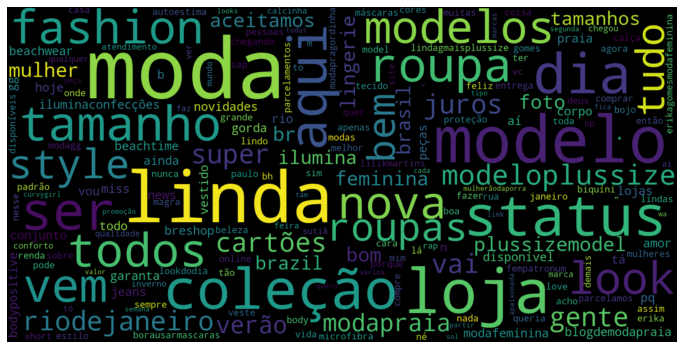

In [431]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_clean
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()